In [2]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
# =============================================================================================

In [3]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('./demo_data/3.concertriccir2.csv', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:2]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df


          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


### Simple Cross Validation 

In [4]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 88%

CV accuracy for k = 3 is 87%

CV accuracy for k = 5 is 86%

CV accuracy for k = 7 is 82%

CV accuracy for k = 9 is 82%

CV accuracy for k = 11 is 79%

CV accuracy for k = 13 is 80%

CV accuracy for k = 15 is 78%

CV accuracy for k = 17 is 80%

CV accuracy for k = 19 is 79%

CV accuracy for k = 21 is 74%

CV accuracy for k = 23 is 73%

CV accuracy for k = 25 is 72%

CV accuracy for k = 27 is 70%

CV accuracy for k = 29 is 69%

****Test accuracy for k = 1 is 90%


### 10 fold cross validation 

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
**************************************************
1

The optimal number of neighbors is 3.


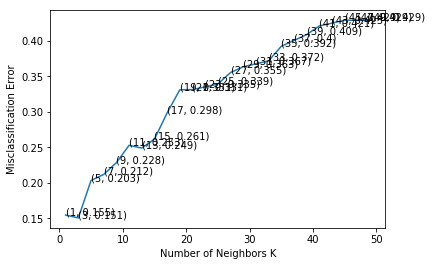

the misclassification error for each k value is :  [0.155 0.151 0.203 0.212 0.228 0.253 0.249 0.261 0.298 0.331 0.331 0.335
 0.339 0.355 0.363 0.367 0.372 0.392 0.4   0.409 0.421 0.425 0.429 0.429
 0.429]


In [9]:


# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
print(neighbors)
print('*'*50)
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr, y_tr, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]
print(MSE.index(min(MSE)))

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [11]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_tr, y_tr)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 3 is 88.666667%
